# Example of classification

# Iris plants dataset

British statistician and biologist Ronald Fisher published in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".

The data set consists of 50 samples from each of three species of Iris.

Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

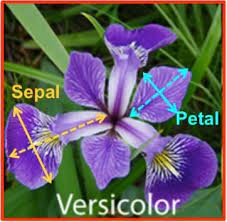


  - https://en.wikipedia.org/wiki/Iris_flower_data_set
  - https://www.kaggle.com/arshid/iris-flower-dataset

### Iris setosa

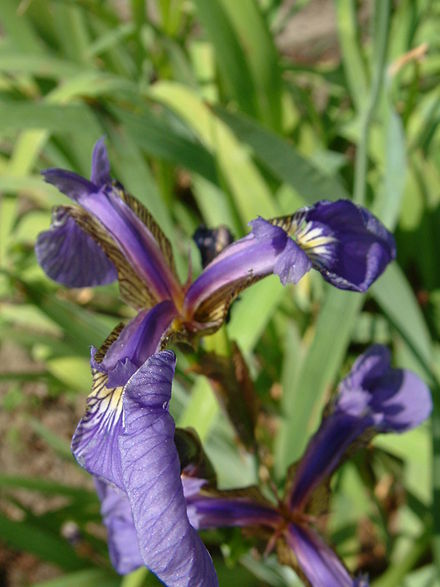

### Iris versicolor

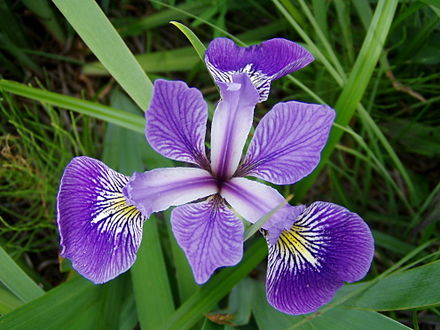

### Iris virginica
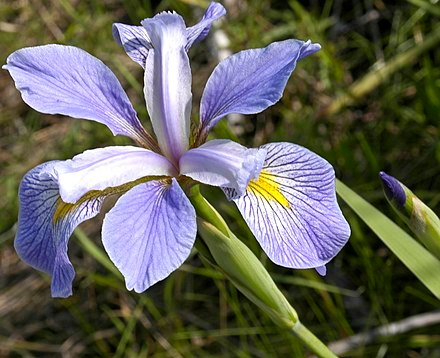

## Objective
Create different models classifing Iris based on measured numbers.

# 1. k-means clustering

### Read input data from CSV file

In [1]:
import pandas as pd
data=pd.read_csv('IRIS.csv')

In [2]:
# information about file structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Data exploration

In [3]:
# first 10 rows
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data transformation - encoding

Numerical models cannot use string features. 

We must encode categorical feature species into numbers.

We use library sklearn with function LabelEncoder. This function creates new numeric column based on column species.

In [5]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['species_enc']=label_encoder.fit_transform(data['species'])

We can display examples of new encoded column.

In [6]:
pd.concat([data.iloc[0:2], data.iloc[60:62], data.iloc[120:122]])

,sepal_length,sepal_width,petal_length,petal_width,species,species_enc
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
60,5.0,2.0,3.5,1.0,Iris-versicolor,1
61,5.9,3.0,4.2,1.5,Iris-versicolor,1
120,6.9,3.2,5.7,2.3,Iris-virginica,2
121,5.6,2.8,4.9,2.0,Iris-virginica,2


In [7]:
# libraries for generating graphs
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# compute correlation of numeric columns
features=list(['sepal_length','sepal_width','petal_length','petal_width','species_enc'])
corr=data[features].corr()

<Axes: >

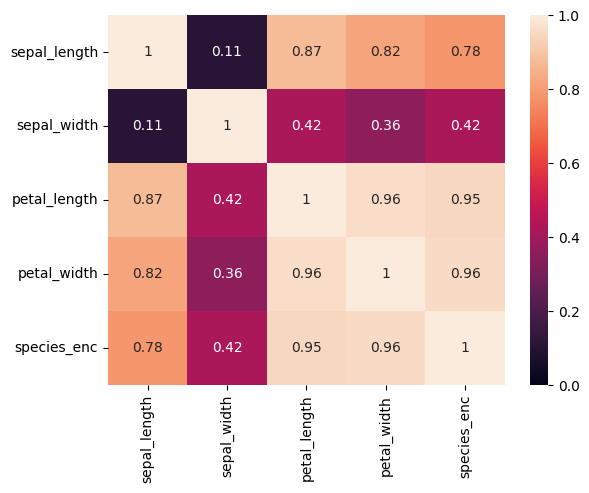

In [9]:
sns.heatmap(corr.abs(), annot=True, vmin=0, vmax=1)

Petal length and petal width are highly positively correlated with species_enc.

They should be good candidates for our model.

### Data visualization

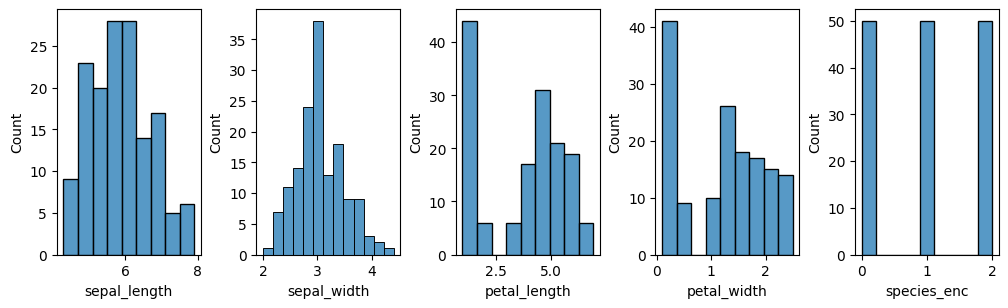

In [10]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(10, 3))
index = 0
axs = axs.flatten()
for k,v in data[features].items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

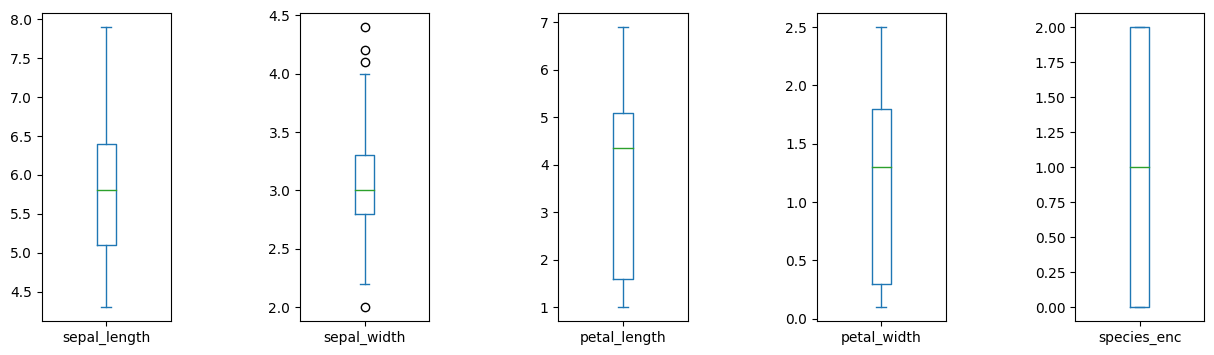

In [11]:
# same information shown in boxplot
data.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 4)
)
plt.subplots_adjust(wspace=1) 
plt.show()

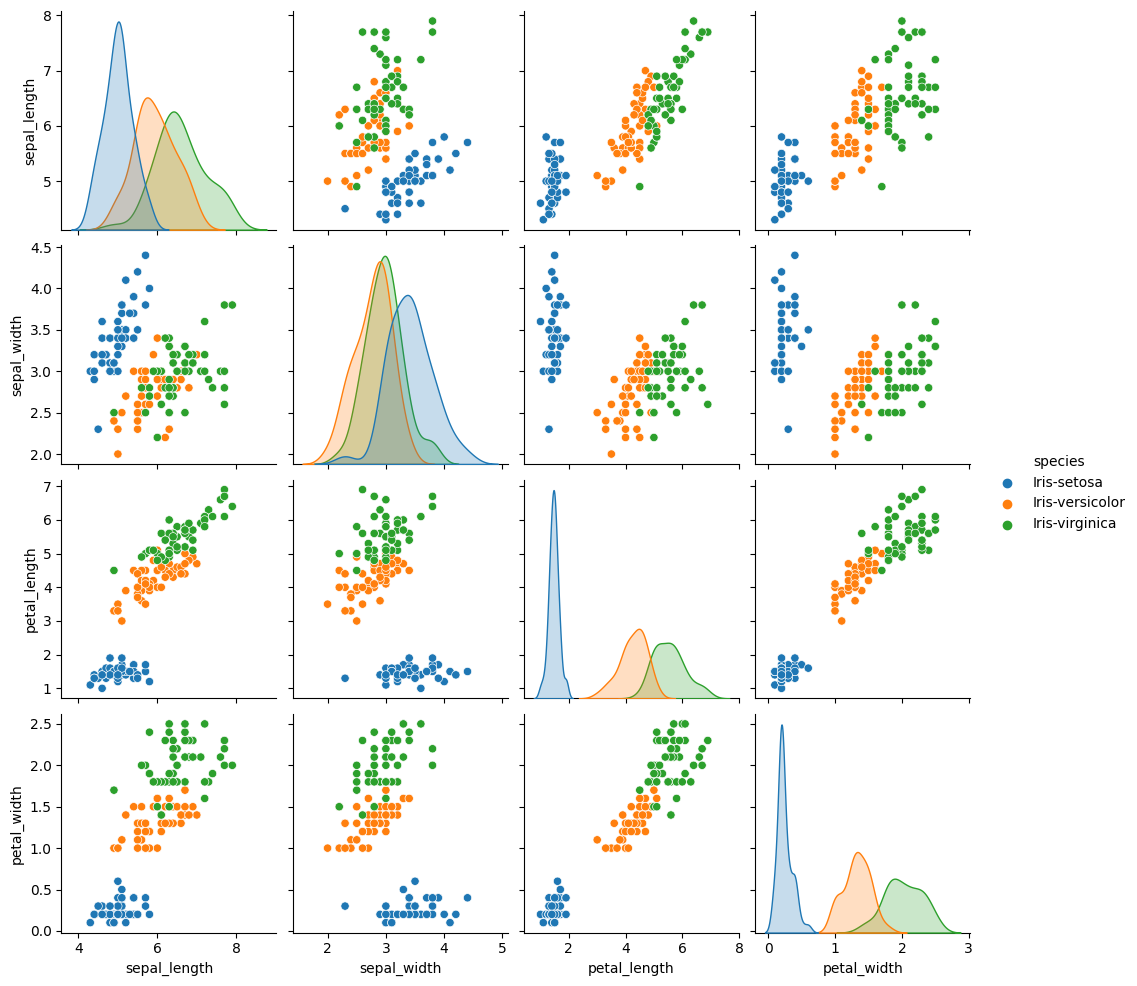

In [12]:
sns.pairplot(data.drop('species_enc', axis=1), hue='species')

### Data preparation

Data doesn't contain NULL values

In [13]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_enc     0
dtype: int64

In [14]:
# selecting input and output features
X = data[['petal_length', 'petal_width']].values
Y = data['species_enc']

Because we will use KNeighborsClassifier, all features should have same scale.

We use StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
import joblib
joblib.dump(sc, 'classification_std_scaler.bin', compress=True)
sc=joblib.load('classification_std_scaler.bin')

In [17]:
from sklearn.model_selection import train_test_split
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(X_train.shape)
print (X_val.shape)
print (X_test.shape)

(112, 2)
(22, 2)
(16, 2)


## k-mean clustering
Algorithm split input data into k cluster. k is input parameter defined by user. For Iris dataset we used k=3, because dataset contains 3 different species.

Each cluster has its center. Observation belongs to the cluster with nearest mean.

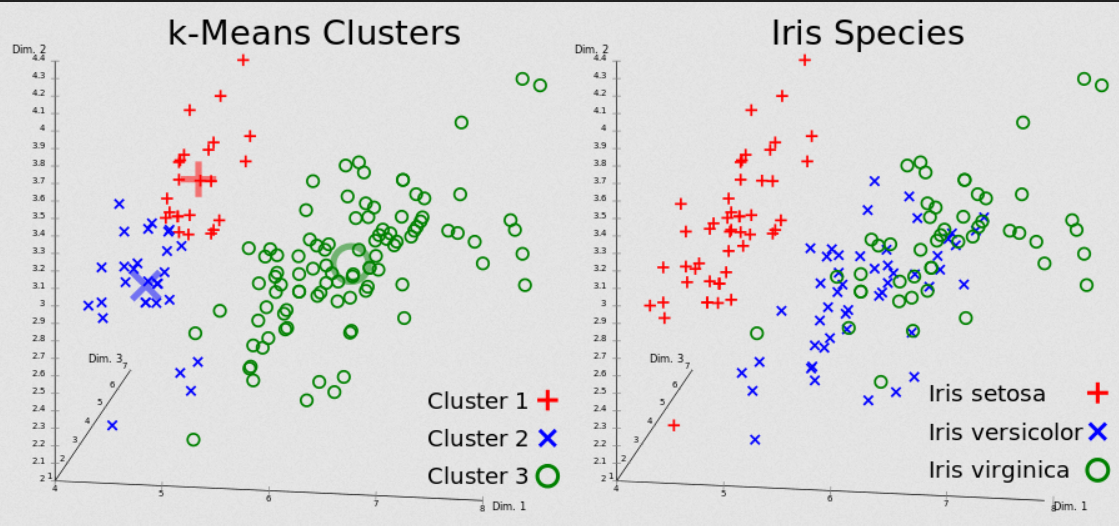

### Training model

In [18]:
from sklearn.neighbors import KNeighborsClassifier
import collections
knn = KNeighborsClassifier (n_neighbors=3)

In [19]:
# natrenovani modelu
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [20]:
# Prediction of new collected data
X_new=sc.transform ([[1.4, 0.2]])
Y_new=knn.predict(X_new)
print (label_encoder.inverse_transform(Y_new))

['Iris-setosa']


In [21]:
# Test dataset prediction
Y_pred=knn.predict(X_test)
label_encoder.inverse_transform(Y_pred)

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Validating model
  - accuracy = number of correct answers / number of answers
  - true positive rates (recall, specifity) = TP / (TP + FN)     the patient has a disease and has been well diagnosed
  - true negative rates (Sensitivity)       = TN / (TN + FP)     the patient does not have a disease and has been well diagnosed
  - precision (positive predictive values)  = TP / (TP + TN)     
  - F measure (harmonic mean precision and recall) = 2 * (precision * recall) / (precision + recall)
  - accurary = (TP + TN) / (N + P)

#### Confusion matrix

<Axes: >

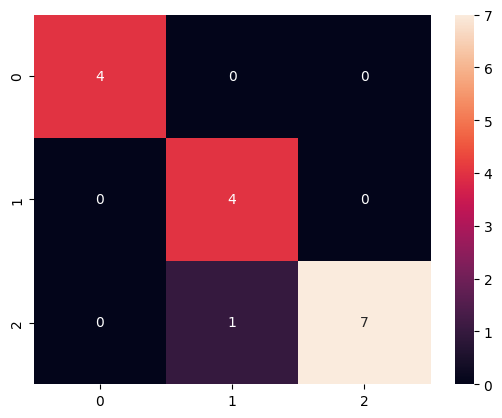

In [22]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(Y_test, Y_pred)
sns.heatmap(cf_matrix, annot=True)

#### Score

In [23]:
#in multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test, Y_pred)
score

0.9375

### Visualization of model

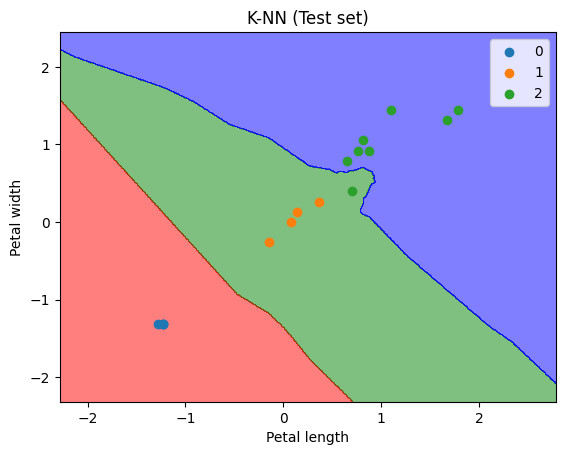

In [24]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
    
X_set, y_set = X_test, Y_test,
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.50, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], 
                X_set[y_set == j, 1],
                     label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.show()

### Saving model

In [25]:
import pickle
filename = 'classification_model.sav'
pickle.dump(knn, open(filename, 'wb'))

In [26]:
loaded_model = pickle.load(open(filename, 'rb'))

### Tuning hyperparameters

Each algorithm has some parameters. Choosing the right parameters can be tricky. 

This function automatically tries all parameter combinations and outputs the optimal combination.

In [27]:
from sklearn.model_selection import GridSearchCV

select_params={'n_neighbors':range(3,4),
               'weights':['uniform','distance'],
               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 
               'metric':['euclidean','manhattan','chebyshev','minkowski']               
              }

grid_knn = GridSearchCV(knn, select_params, cv=5)
grid_knn.fit(X_train, Y_train)

print('Best parameters: {}'.format(grid_knn.best_params_))
print('Best score on training set: {}'.format(grid_knn.best_score_))

Best parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best score on training set: 0.9640316205533598


# 2. Neural network

### Reading dataset

In [28]:
import pandas as pd
data=pd.read_csv('IRIS.csv')

### Data transformation - encoding and standardization

We need another method of encoding string data to numbers for neural networks.

The output layer of the neural network for classification contains the number of neurons equal to the number of classes. Each output neuron returns the probability that the input data belongs to a given class.

In our case, we will convert the species column into three columns that will determine the probability of the classes.

We use function get_dummies in library pandas.

In [29]:
encoded_data = pd.get_dummies (data, prefix='species')

In [30]:
pd.concat([encoded_data.iloc[0:2], encoded_data.iloc[60:62], encoded_data.iloc[120:122]])

,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
60,5.0,2.0,3.5,1.0,0,1,0
61,5.9,3.0,4.2,1.5,0,1,0
120,6.9,3.2,5.7,2.3,0,0,1
121,5.6,2.8,4.9,2.0,0,0,1


In [31]:
# selecting input and output features
X = encoded_data[['petal_length', 'petal_width']].values
Y = encoded_data[['species_Iris-setosa', 'species_Iris-versicolor', 'species_Iris-virginica']].values

We use StandardScaler to standardize input features.

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

Input learning data contains 2 columns, data with results contains 3 columns.

In [33]:
print (X.shape)
print (Y.shape)

(150, 2)
(150, 3)


### Splitting dataset to training, validation and test subset.

In [34]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(X_train.shape)
print (X_val.shape)
print (X_test.shape)

(112, 2)
(22, 2)
(16, 2)


### Modeling neural network

Model of neural network
* Sequential model - data is passed from input layer through hidden layers to output layer.
* Dense layer connect each neuron from previous layer to each neuron in layer
* Drop layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.
* Activation functions RELU and Softmax are used. 
* Last softmax function is used in output layer because this project is classification.

* The compilation is the final step in creating a model.
* The optimizer we are using is adam. Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
* Loss function - categorical_crossentropy, special lost function for classification (https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class)
* During learning another metrics is computed - accuracy

In [35]:
import keras
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.models import Sequential

In [36]:
model = Sequential()

model.add(Dense(16, activation = "relu", input_dim=2))
model.add(Dropout(0.2))
model.add(Dense(16, activation = "relu"))
model.add(Dropout(.2))
model.add(Dense(units = 3, activation = 'softmax'))

model.compile(loss = "categorical_crossentropy",
                optimizer = "adam",
                metrics = ["accuracy"]
                )

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [38]:
from keras_visualizer import visualizer 
visualizer(model, file_format='png', view=True)

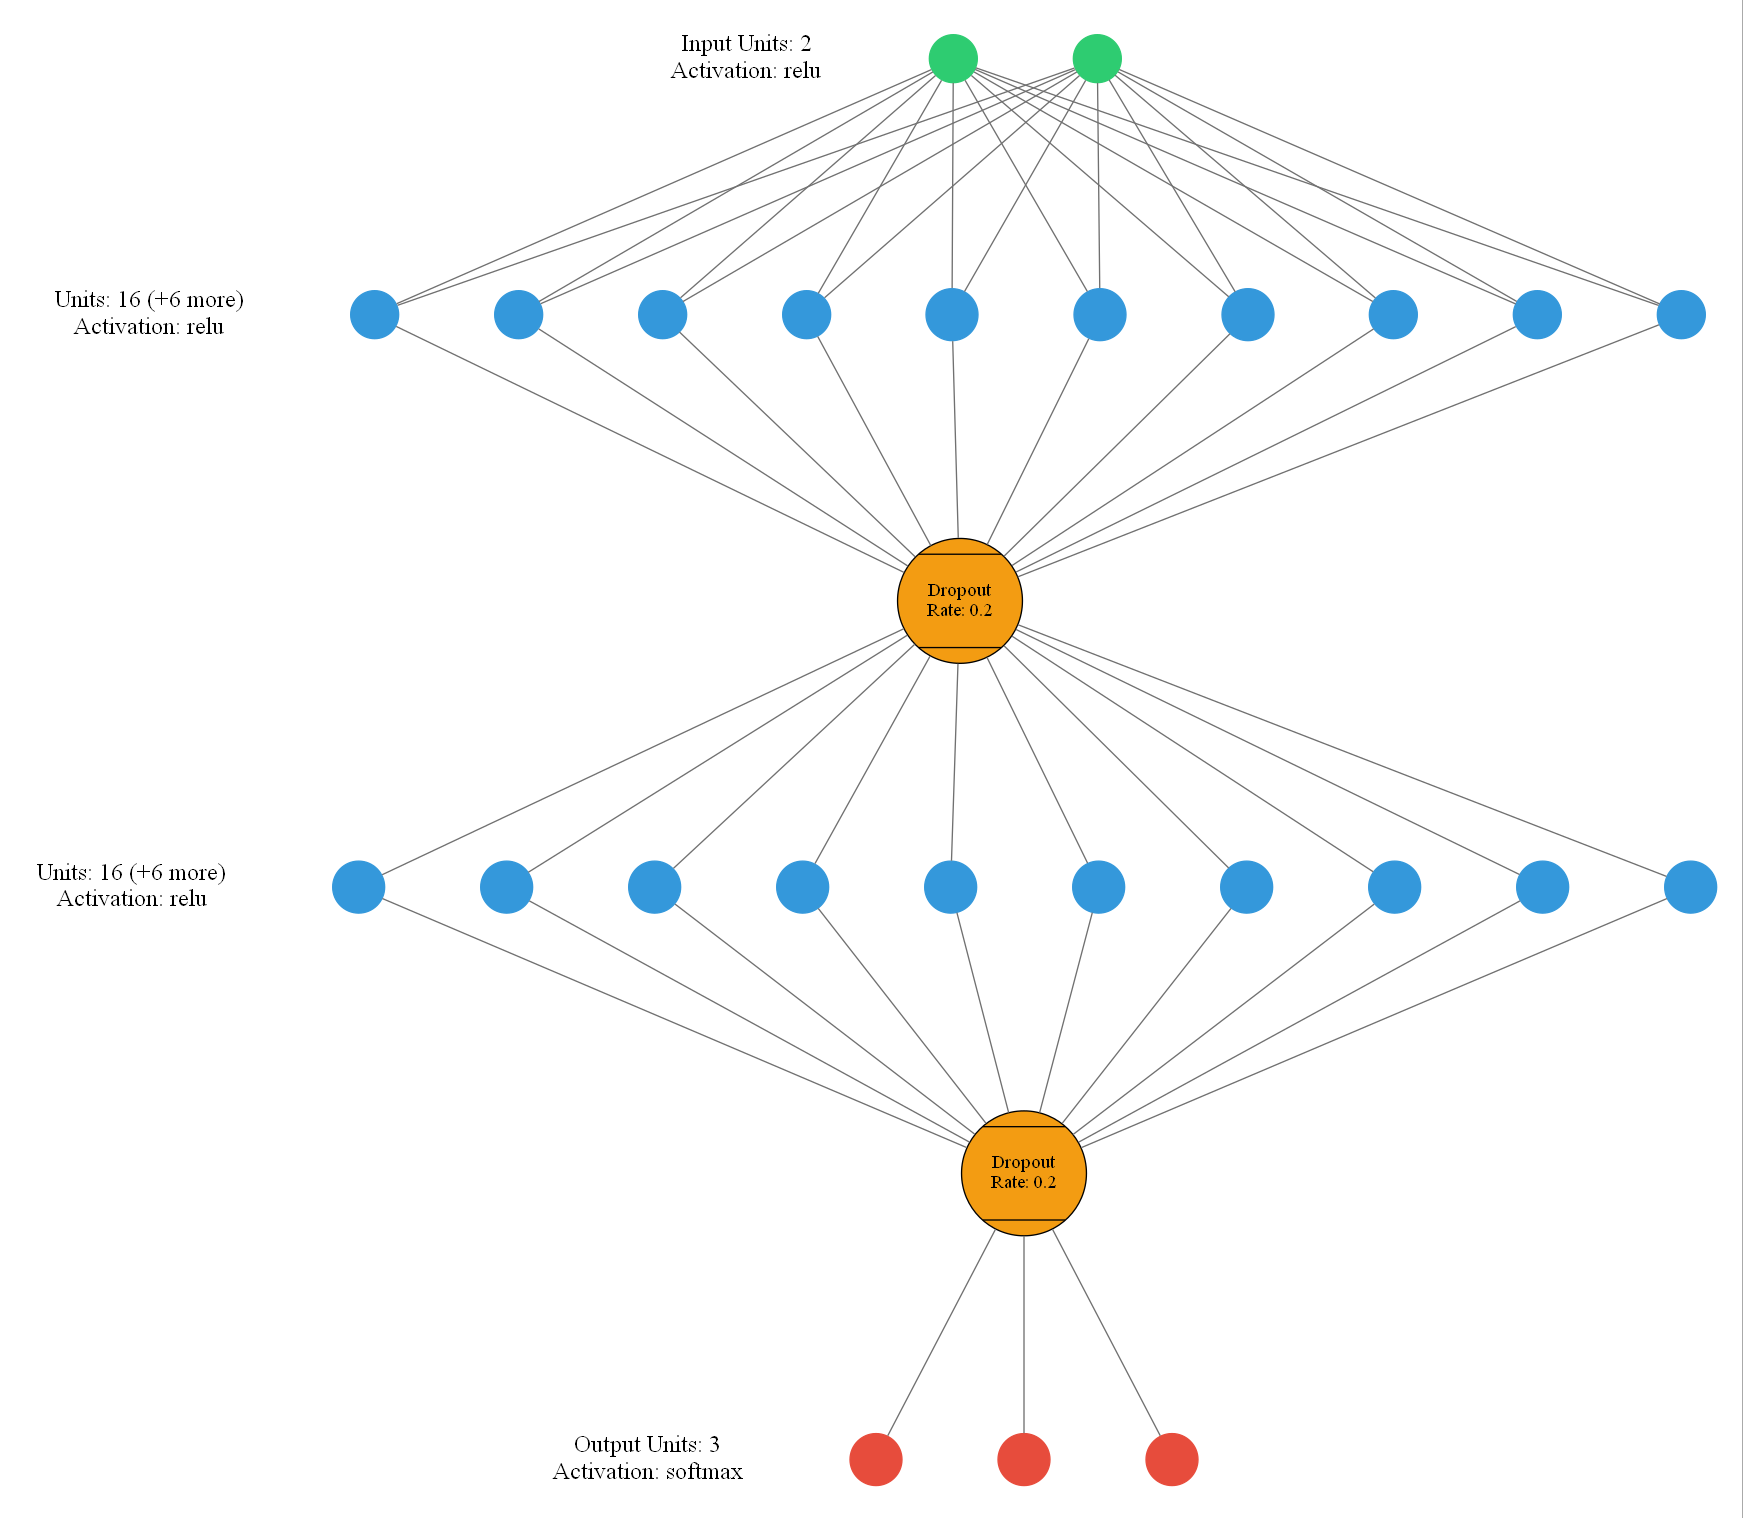

In [39]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
history=model.fit(X_train, Y_train, epochs=500, batch_size=5, validation_data=(X_val, Y_val), callbacks=[early_stop])

#history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=500, batch_size=7)

Epoch 1/500
23/23 [==============================] - 1s 11ms/step - loss: 1.1131 - accuracy: 0.2768 - val_loss: 1.0107 - val_accuracy: 0.3182
Epoch 2/500
23/23 [==============================] - 0s 3ms/step - loss: 0.9552 - accuracy: 0.3661 - val_loss: 0.9269 - val_accuracy: 0.3636
Epoch 3/500
23/23 [==============================] - 0s 3ms/step - loss: 0.8699 - accuracy: 0.5536 - val_loss: 0.8629 - val_accuracy: 0.5909
Epoch 4/500
23/23 [==============================] - 0s 3ms/step - loss: 0.7996 - accuracy: 0.6250 - val_loss: 0.8078 - val_accuracy: 0.5909
Epoch 5/500
23/23 [==============================] - 0s 3ms/step - loss: 0.7673 - accuracy: 0.6875 - val_loss: 0.7577 - val_accuracy: 0.5909
Epoch 6/500
23/23 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.7143 - val_loss: 0.7060 - val_accuracy: 0.5909
Epoch 7/500
23/23 [==============================] - 0s 3ms/step - loss: 0.6397 - accuracy: 0.7143 - val_loss: 0.6647 - val_accuracy: 0.5909
Epoch 8/500


In [40]:
model.save('classification_model_iris.h5')

### Validation of model

In [41]:
Y_pred = model.predict(X_test)
Y_pred

1/1 [==============================] - 0s 88ms/step


array([[6.0487328e-05, 9.3357021e-01, 6.6369228e-02],
       [4.7439412e-13, 9.8588155e-04, 9.9901414e-01],
       [6.0487328e-05, 9.3357021e-01, 6.6369228e-02],
       [9.9999976e-01, 2.9771752e-07, 2.8018571e-08],
       [6.9343275e-04, 9.6933663e-01, 2.9969912e-02],
       [1.0530325e-05, 7.4866962e-01, 2.5131986e-01],
       [7.4407364e-12, 4.1182758e-03, 9.9588180e-01],
       [5.9949164e-04, 9.6980125e-01, 2.9599283e-02],
       [1.0000000e+00, 1.5398989e-08, 1.8919983e-09],
       [2.8714785e-15, 1.1601633e-04, 9.9988401e-01],
       [1.5165900e-04, 9.5234174e-01, 4.7506548e-02],
       [1.0000000e+00, 4.5881080e-08, 4.8915743e-09],
       [1.0742431e-03, 9.7164673e-01, 2.7279120e-02],
       [1.0000000e+00, 4.5881080e-08, 4.8915743e-09],
       [9.9999785e-01, 2.0798534e-06, 1.7250231e-07],
       [7.4557043e-05, 9.4471931e-01, 5.5206113e-02]], dtype=float32)

In [42]:
Y_pred_best_answer = np.argmax(Y_pred, axis=-1)
Y_pred_best_answer

array([1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 0, 1], dtype=int64)

In [43]:
Y_test_best_answer=np.argmax(Y_test, axis=-1)
Y_test_best_answer

array([1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 0, 1], dtype=int64)

<Axes: >

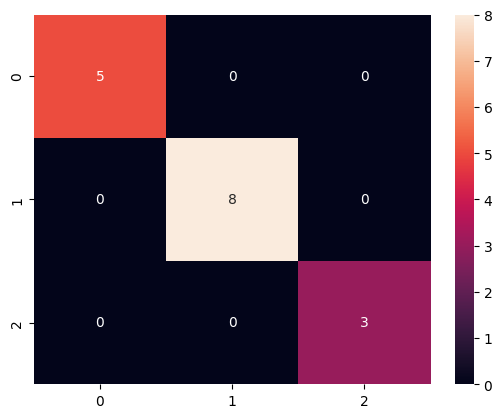

In [44]:
from sklearn.metrics import confusion_matrix
cf_matrix=confusion_matrix(Y_test_best_answer, Y_pred_best_answer)
sns.heatmap(cf_matrix, annot=True)

In [45]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print (f"Loss function: {scores[0]}")
print (f"Accuracy: {scores[1]}")

Loss function: 0.03927727788686752
Accuracy: 1.0


### History of learning

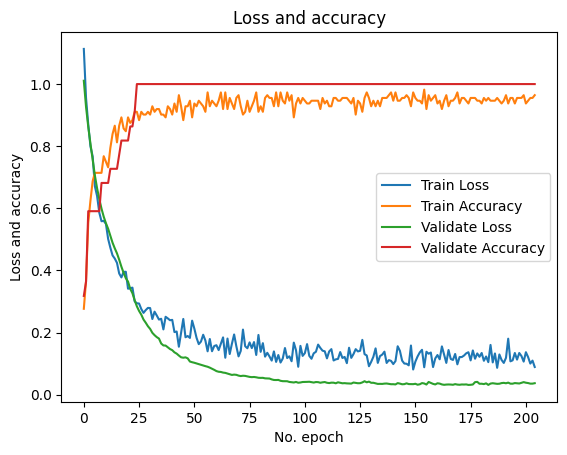

In [46]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_loss'], label='Validate Loss')
plt.plot(history.history['val_accuracy'], label='Validate Accuracy')
plt.legend(loc="right")
plt.title('Loss and accuracy')
plt.ylabel('Loss and accuracy')
plt.xlabel('No. epoch')
plt.show()

### Using model

In [47]:
test_predictions = model.predict([[1,2]])

1/1 [==============================] - 0s 76ms/step


In [48]:
print (f"Iris setosa:     {test_predictions[0][0]}")
print (f"Iris versicolor: {test_predictions[0][1]}")
print (f"Iris virginica:  {test_predictions[0][2]}")

Iris setosa:     2.5934171022994838e-15
Iris versicolor: 0.00023634349054191262
Iris virginica:  0.9997636675834656
